# Basic Machine Learning

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as  sns

In [51]:
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)  
y = np.array([3, 4, 2, 5, 6, 7]) 

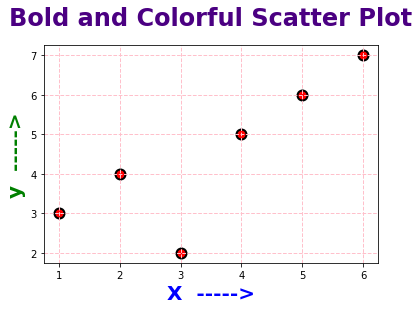

In [52]:
plt.scatter(X,y , color='red' , edgecolors='black' , s=100 , linewidths=2)
plt.xlabel("X  ----->" , color='blue', fontsize=20 , fontweight='bold')
plt.ylabel("y  ----->" , color='green', fontsize=20 , fontweight='bold')
plt.title("Bold and Colorful Scatter Plot", color='indigo', fontsize=24, fontweight='bold' , loc='center' , pad=20)
plt.grid(True,linestyle='--', linewidth=1, color='pink')

plt.show()

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10.979999999999993


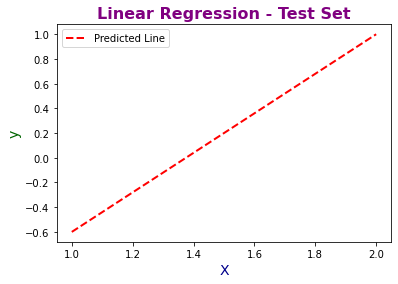

In [60]:
plt.plot(X_test, y_pred, color='red', linewidth=2, linestyle='--', label='Predicted Line')
plt.xlabel('X', color='darkblue', fontsize=14)
plt.ylabel('y', color='darkgreen', fontsize=14)
plt.title('Linear Regression - Test Set', color='purple', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

# Feature Engineering

Q1. Can you describe the steps involved in feature engineering?


Answer: The steps in feature engineering include understanding the data, handling missing values, encoding categorical variables, scaling and normalization, creating new features, and selecting the most relevant features. Each step is crucial to ensure the model receives the best possible data representation.


Q2. What are the benefits of feature engineering in machine learning?


Answer: Feature engineering improves model performance by making patterns more apparent, reduces overfitting by removing irrelevant features, enhances interpretability, and increases efficiency by reducing the computational load.


In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [63]:
import pandas as pd
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [66]:
# Check the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())


Dataset contains 891 rows and 12 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin  

In [67]:
data_cleaned = data.dropna()
print(f"Dataset after removing missing values contains {data_cleaned.shape[0]} rows and {data_cleaned.shape[1]} columns.")


Dataset after removing missing values contains 183 rows and 12 columns.


In [71]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data['Age'] = imputer.fit_transform(data[['Age']])

data['Cabin'].fillna('Unknown', inplace=True)

# Check again for missing values
print(data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


In [72]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1  # +1 to include the passenger themselves
print(data[['SibSp', 'Parch', 'FamilySize']].head())


   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


In [73]:
from sklearn.preprocessing import OneHotEncoder
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare    Cabin  FamilySize  Sex_male  Embarked_Q  \
0         A/5 21171   7.2500  Unknown           2      True       False   
1          PC 17599  71.2833      C85           2     False       False   
2  STON/O2. 3101282   7.9250  Unknown           1     False       False   
3            113803  53.10

In [74]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Age', 'Fare', 'FamilySize']

scaler = StandardScaler()

data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data[numerical_features].head())


        Age      Fare  FamilySize
0 -0.565736 -0.502445    0.059160
1  0.663861  0.786845    0.059160
2 -0.258337 -0.488854   -0.560975
3  0.433312  0.420730    0.059160
4  0.433312 -0.486337   -0.560975


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X = data[['Age', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)



# Predict on the test set
y_pred = model.predict(X_test)



# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.79
